In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
customer_data = pd.read_csv("/content/Mall_Customers.csv")

In [5]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
customer_data.tail()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [7]:
customer_data.shape

(200, 5)

In [8]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
customer_data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [13]:
#Choosing annual income and spending score column

X = customer_data.iloc[:,[3,4]].values
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [15]:
#Choosing the number of clusters

#Using WCSS --> Within Cluster sum of squares

#Finding WCSS values fro different clusters

WCSS = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state = 7)
  kmeans.fit(X)
  WCSS.append(kmeans.inertia_)
  print(WCSS)

[269981.28000000014]
[269981.28000000014, 184131.8850278851]
[269981.28000000014, 184131.8850278851, 154609.87034894925]
[269981.28000000014, 184131.8850278851, 154609.87034894925, 73880.64496247198]
[269981.28000000014, 184131.8850278851, 154609.87034894925, 73880.64496247198, 44448.45544793369]
[269981.28000000014, 184131.8850278851, 154609.87034894925, 73880.64496247198, 44448.45544793369, 38858.959975143895]
[269981.28000000014, 184131.8850278851, 154609.87034894925, 73880.64496247198, 44448.45544793369, 38858.959975143895, 31969.42655023547]
[269981.28000000014, 184131.8850278851, 154609.87034894925, 73880.64496247198, 44448.45544793369, 38858.959975143895, 31969.42655023547, 29829.739639657655]
[269981.28000000014, 184131.8850278851, 154609.87034894925, 73880.64496247198, 44448.45544793369, 38858.959975143895, 31969.42655023547, 29829.739639657655, 28268.81430258338]
[269981.28000000014, 184131.8850278851, 154609.87034894925, 73880.64496247198, 44448.45544793369, 38858.9599751438

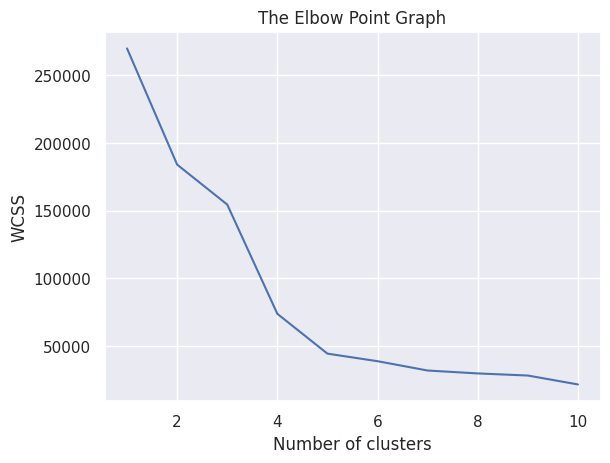

In [16]:
#Plotting an elbow graph

sns.set()
plt.plot(range(1,11), WCSS)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Optimum number of clusters  = 5 (as in the elbow point graph the WCSS doesnt decrease more after numbe rof clusters=5)

In [18]:
#Training the k means clustering model

model = KMeans(n_clusters=5, init='k-means++', random_state=0)
y_means = model.fit_predict(X)
print(y_means)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


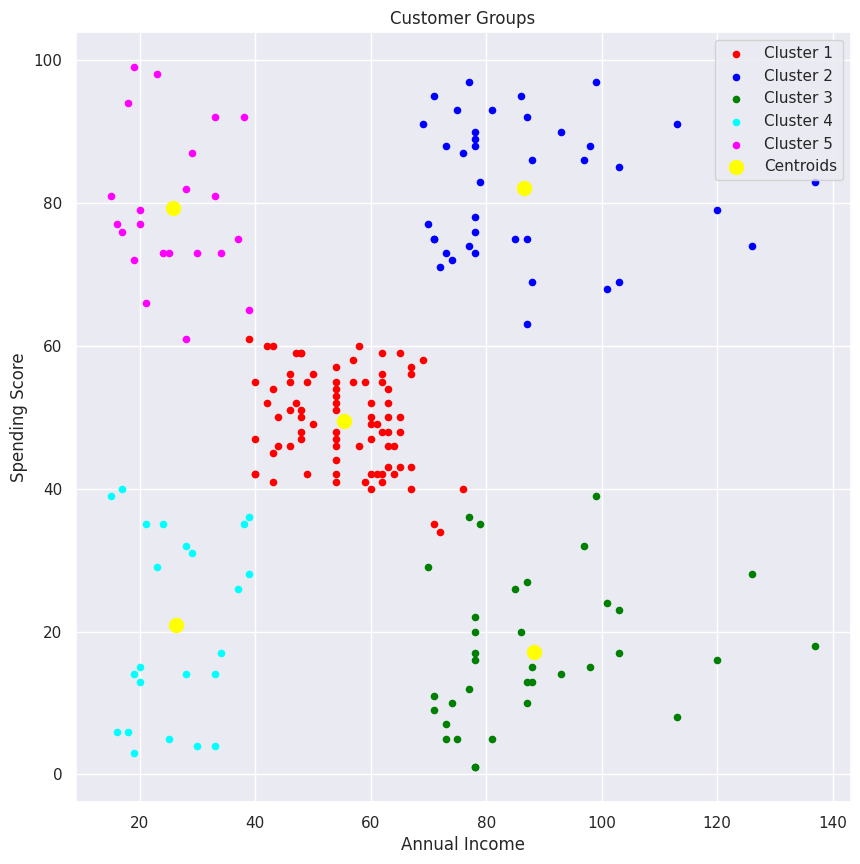

In [25]:
#Visulaising all the clusters

plt.figure(figsize=(10,10))
plt.scatter(X[y_means == 0, 0], X[y_means== 0, 1], s = 20 , c = 'red', label = 'Cluster 1')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s = 20, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_means == 2, 0], X[y_means== 2, 1], s = 20, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1], s = 20, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_means == 4, 0], X[y_means == 4, 1], s = 20, c = 'magenta', label = 'Cluster 5')

#Plotting Centroids

plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()